# Execute the code below

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
df_music.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# Standardization and classification

## Create a new DataFrame **df_zoom** with only genres 'Country' and 'Classical'

In [2]:
# Your code here :
df_zoom = df_music[df_music['genre'].isin(['Country', 'Classical'])]
df_zoom.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
genre,17920,2,Classical,9256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_name,17920,1642,Wolfgang Amadeus Mozart,800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_name,17920,17383,Home,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_id,17920,17920,1Z7Fm3IKIIvJTWgQznuLPN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popularity,17920,NaN,NaN,NaN,37.4135,14.8234,0,31,39,46,82
acousticness,17920,NaN,NaN,NaN,0.579396,0.395669,1.46e-06,0.138,0.732,0.969,0.996
danceability,17920,NaN,NaN,NaN,0.437021,0.183354,0.0582,0.291,0.453,0.583,0.964
duration_ms,17920,NaN,NaN,NaN,265327,162627,15509,186237,222962,287371,3.39104e+06
energy,17920,NaN,NaN,NaN,0.39958,0.313253,2.03e-05,0.095975,0.346,0.698,0.995
instrumentalness,17920,NaN,NaN,NaN,0.312326,0.403325,0,0,0.00112,0.839,0.994


## Draw a scatterplot from df_zoom with
- 'duration_ms' on X axis 
- 'speechiness' on Y axis
- 'genre' in hue

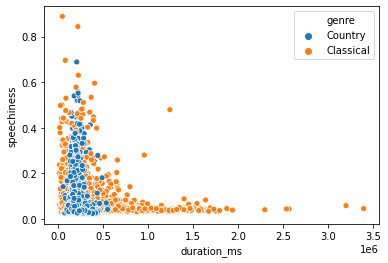

In [3]:
# Your code here :
p = sns.scatterplot(x = 'duration_ms', y = 'speechiness', data = df_zoom, hue = 'genre')

## Classification
From df_zoom : 
- define X ('duration_ms' and 'speechiness') 
- define y ('genre')
- split your datas into train and test datasets, and random_state = 2
- perform 3 classification algorithms (Logistic Regression, KNN and Decision Tree)
- score your 3 models with accuracy score on the test dataset


In [0]:
# Your code here :
X = df_zoom[['duration_ms', 'speechiness']]
y = df_zoom['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, train_size = 0.75)

In [5]:
# Logistic regression
LogisticModel = LogisticRegression().fit(X_train, y_train)

print("\nScore for the Train dataset :", round(LogisticModel.score(X_train, y_train), 5))
print("Score for the Test dataset :", round(LogisticModel.score(X_test, y_test), 5))


Score for the Train dataset : 0.51875
Score for the Test dataset : 0.50982


In [6]:
# KNN
kNNRegModel = KNeighborsClassifier().fit(X_train, y_train)

print("\nScore for the Train dataset :", round(kNNRegModel.score(X_train, y_train), 5))
print("Score for the Test dataset :", round(kNNRegModel.score(X_test, y_test), 5))


Score for the Train dataset : 0.79799
Score for the Test dataset : 0.71295


In [7]:
# Decision tree
DTmodel = DecisionTreeClassifier().fit(X_train, y_train)

print("\nScore for the Train dataset :", round(DTmodel.score(X_train, y_train), 5))
print("Score for the Test dataset :", round(DTmodel.score(X_test, y_test), 5))


Score for the Train dataset : 0.99978
Score for the Test dataset : 0.73705



You have to find these accuracy scores for test set :
- Logistic regression : 0.50982
- KNN : 0.71295
- Decision tree : 0.73728

It seems Decision tree is better, but did you look at the overfitting ?

## Standardization

- Fit your scaler model on X_train
- Transform X_train and X_test  with your scaler model into  X_train_scaled and X_test_scaled
- perform and score the same 3 classification algorithms, but with X_train_scaled and X_test_scaled

In [0]:
# Your code here :

# Create and fit a scaler model
scaler = StandardScaler().fit(X_train)

# Your scaler model can now transform your data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Logistic regression
LogisticModel = LogisticRegression().fit(X_train_scaled , y_train)

print("\nScore for the Train dataset :", round(LogisticModel.score(X_train_scaled, y_train), 5))
print("Score for the Test dataset :", round(LogisticModel.score(X_test_scaled, y_test), 5))


Score for the Train dataset : 0.65781
Score for the Test dataset : 0.66674


In [10]:
# KNN
kNNRegModel = KNeighborsClassifier().fit(X_train_scaled , y_train)

print("\nScore for the Train dataset :", round(kNNRegModel.score(X_train_scaled, y_train), 5))
print("Score for the Test dataset :", round(kNNRegModel.score(X_test_scaled, y_test), 5))


Score for the Train dataset : 0.83646
Score for the Test dataset : 0.77433


In [11]:
# Decision tree
DTmodel = DecisionTreeClassifier().fit(X_train_scaled , y_train)

print("\nScore for the Train dataset :", round(DTmodel.score(X_train_scaled, y_train), 5))
print("Score for the Test dataset :", round(DTmodel.score(X_test_scaled, y_test), 5))


Score for the Train dataset : 0.99978
Score for the Test dataset : 0.73571


# Conclusion
- Decision tree is insensitive to Standardization.
- Logistic regression and KNN have better result after Standardization.


We can remember that standardization is always good in preprocessing, before machine learning classifications and regressions. At worst, it does not change anything. At best, it improves results.